In [115]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle

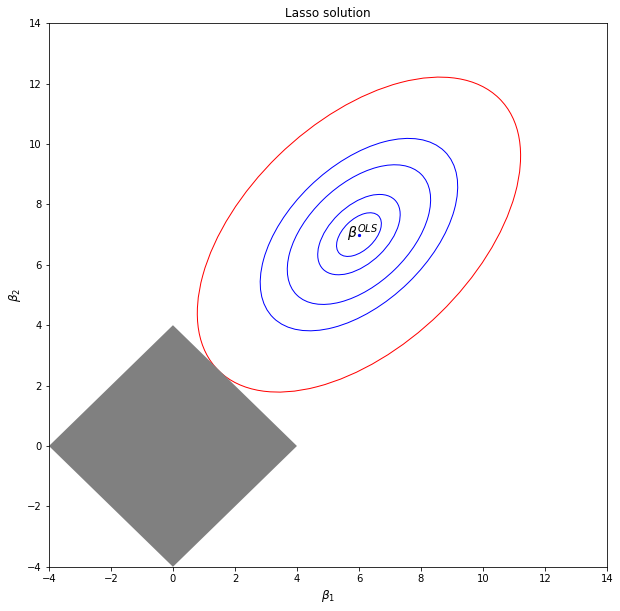

In [114]:
orthonorm = 0
s = 4
beta = [6, 7]

if orthonorm == 1:
    corrmat = np.array([[1, 0], [0, 1]])
    ellip1 = Ellipse(xy = [beta[0], beta[1]], 
                     width = np.sqrt(1 + corrmat[0,1])*2*chi2.ppf(0.96, 2), 
                     height = np.sqrt(1 - corrmat[0,1])*2*chi2.ppf(0.96, 2), 
                     facecolor = "w", edgecolor = "r", zorder = 0)
elif orthonorm == 0:
    corrmat = np.array([[1, 0.5], [0.5, 1]])
    ellip1 = Ellipse(xy = [beta[0], beta[1]], 
                     width = np.sqrt(1 + corrmat[0,1])*1.62*chi2.ppf(0.96, 2), 
                     height = np.sqrt(1 - corrmat[0,1])*1.62*chi2.ppf(0.96, 2), 
                     angle = 45,
                     facecolor = "w", edgecolor = "r", zorder = 0)
else:
    print("Give either 1 or 0")
    
conflev = [0.86, 0.76, 0.56, 0.36]

fig, ax = plt.subplots(figsize = (10,10))
ax.add_patch(ellip1)
ax.add_patch(Rectangle(xy = (0, -s), width = s*np.sqrt(2), height = s*np.sqrt(2), angle=45, facecolor = "grey"))

if orthonorm == 1:
    for i in conflev:
        ax.add_patch(Ellipse(xy = [beta[0], beta[1]], width = np.sqrt(1 + corrmat[0,1])*2*chi2.ppf(i, 2), 
                             height = np.sqrt(1 - corrmat[0,1])*2*chi2.ppf(i, 2), 
                             facecolor = "w", edgecolor = "b", angle = 45, zorder = 0))
elif orthonorm == 0:
    for i in conflev:
        ax.add_patch(Ellipse(xy = [beta[0], beta[1]], width = np.sqrt(1 + corrmat[0,1])*1.62*chi2.ppf(i, 2), 
                             height = np.sqrt(1 - corrmat[0,1])*1.62*chi2.ppf(i, 2), 
                             facecolor = "w", edgecolor = "b", angle = 45, zorder = 0))
        
ax.scatter(6, 7, c = "b", s = 5)
ax.text(5.6, 6.9, r"$\beta^{OLS}$", fontsize = 14)

ax.set_xlim(-4, 14)
ax.set_ylim(-4, 14)

ax.set_title("Lasso solution")
ax.set_xlabel(r"$\beta_1$", fontsize = 12)
ax.set_ylabel(r"$\beta_2$", fontsize = 12)

plt.show()